<a href="https://colab.research.google.com/github/LTRibeiros/AnaliseDeDados_Python/blob/main/correlacao_regressao_linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CORRELAÇÃO E REGRESSÃO LINEAR SIMPLES**

# **Análise e Tratamento dos Dados**

In [3]:
import numpy as np
import pandas as pd

In [5]:
mola = pd.read_csv('/content/drive/MyDrive/rigidez.csv',
                    sep=';', encoding='iso-8859-1')
# encoding: codificação de caracteres, normalmente utiliza-se o iso-8859-1, utf-8, latin-1)

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Objetivo: Analisar a correlação entre a força e a deformação sofrida por uma mola e criar um modelo de regressão linear.**

In [7]:
mola.head()

,cargas,forca,Lo,L,x,K
0,1,0.10,27.0,29.90,0.0029,34.48
1,2,0.15,27.0,31.30,0.0043,34.88
2,3,0.18,27.0,NaN,NaN,NaN
3,4,0.23,27.0,34.00,0.0070,32.86
4,5,0.31,27.0,35.53,0.0085,36.34


In [ ]:
mola.shape

In [8]:
# Renomear uma variável
mola.rename(columns={'Lo': 'compr_inicial'}, inplace=True)

In [9]:
mola.head()

,cargas,forca,compr_inicial,L,x,K
0,1,0.10,27.0,29.90,0.0029,34.48
1,2,0.15,27.0,31.30,0.0043,34.88
2,3,0.18,27.0,NaN,NaN,NaN
3,4,0.23,27.0,34.00,0.0070,32.86
4,5,0.31,27.0,35.53,0.0085,36.34


In [10]:
# Renomear mais de uma variável
mola.rename(columns={'L': 'compr_final','x': 'deformacao', 'K': 'rigidez'}, inplace=True)

In [ ]:
mola.head()

In [11]:
# Análise dos tipos de atributos.
# object: strings
# int64: inteiros
# float64: reais
# complex: complexos
mola.dtypes

,0
cargas,int64
forca,float64
compr_inicial,float64
compr_final,float64
deformacao,float64
rigidez,float64


In [12]:
# Excluir variável
mola1 = mola.drop(columns=['compr_inicial'])
mola1.head()

,cargas,forca,compr_final,deformacao,rigidez
0,1,0.10,29.90,0.0029,34.48
1,2,0.15,31.30,0.0043,34.88
2,3,0.18,NaN,NaN,NaN
3,4,0.23,34.00,0.0070,32.86
4,5,0.31,35.53,0.0085,36.34


Valores Missing (NAN)

In [13]:
# RELAÇÃO DA QUANTIDADE
mola1.isnull().sum()

,0
cargas,0
forca,0
compr_final,1
deformacao,1
rigidez,1


In [14]:
mola1['deformacao'].isnull().sum()

np.int64(1)

In [ ]:
# EXCLUIR TODOS OS VALORES MISSING
mola1 = mola1.dropna()

In [ ]:
mola1.head()

In [15]:
mola1.describe()

,cargas,forca,compr_final,deformacao,rigidez
count,30.000000,30.000000,29.000000,29.000000,29.000000
mean,15.500000,1.519000,139.050690,0.112050,30.823448
std,8.803408,0.978103,343.474372,0.343475,5.840459
min,1.000000,0.100000,29.900000,0.002900,1.640000
25%,8.250000,0.690000,50.000000,0.023000,30.770000
50%,15.500000,1.450000,76.400000,0.049400,31.300000
75%,22.750000,2.235000,99.740000,0.072740,32.860000
max,30.000000,3.200000,1918.000000,1.891000,36.340000


In [59]:
# SUBSTITUIR OS VALORES MISSING PELA MEDIANA
mola2 = mola['compr_final'].fillna(mola['compr_final'].median())

In [17]:
mola2.head()

,compr_final
0,29.90
1,31.30
2,76.40
3,34.00
4,35.53


In [58]:
# SUBSTITUIR OS VALORES MISSING PELA MÉDIA
mola3 = mola['deformacao'].fillna(mola['deformacao'].mean())
mola3.head()

,deformacao
0,0.00290
1,0.00430
2,0.11205
3,0.00700
4,0.00850


In [19]:
mola1.rigidez.value_counts()

,count
rigidez,
30.81,3
31.30,2
34.88,1
32.86,1
31.25,1
36.34,1
31.98,1
33.66,1
33.33,1


In [57]:
# SUBSTITUIR OS VALORES MISSING PELA MODA
mola4 = mola['rigidez'].fillna(30.81)
mola4.head()

,rigidez
0,34.48
1,34.88
2,30.81
3,32.86
4,36.34


Análise dos outliers

In [20]:
import plotly.express as px

In [21]:
boxplot = px.box(mola1, y="forca")
boxplot.show()

In [22]:
boxplot = px.box(mola1, y="deformacao")
boxplot.show()

In [23]:
mola1.head(30)

,cargas,forca,compr_final,deformacao,rigidez
0,1,0.10,29.90,0.00290,34.48
1,2,0.15,31.30,0.00430,34.88
2,3,0.18,NaN,NaN,NaN
3,4,0.23,34.00,0.00700,32.86
4,5,0.31,35.53,0.00850,36.34
5,6,0.45,41.40,0.01440,31.25
6,7,0.55,44.20,0.01720,31.98
7,8,0.68,47.20,0.02020,33.66
8,9,0.72,50.00,0.02300,31.30
9,10,0.83,51.90,0.02490,33.33


In [24]:
boxplot = px.box(mola1, y="rigidez")
boxplot.show()

In [ ]:
mola1.head(30)

In [25]:
mola1.drop(28, inplace=True)

In [26]:
mola1.head(30)

,cargas,forca,compr_final,deformacao,rigidez
0,1,0.10,29.90,0.00290,34.48
1,2,0.15,31.30,0.00430,34.88
2,3,0.18,NaN,NaN,NaN
3,4,0.23,34.00,0.00700,32.86
4,5,0.31,35.53,0.00850,36.34
5,6,0.45,41.40,0.01440,31.25
6,7,0.55,44.20,0.01720,31.98
7,8,0.68,47.20,0.02020,33.66
8,9,0.72,50.00,0.02300,31.30
9,10,0.83,51.90,0.02490,33.33


# **ANÁLISE DA CORRELAÇÃO LINEAR**

In [27]:
import matplotlib.pyplot as plt

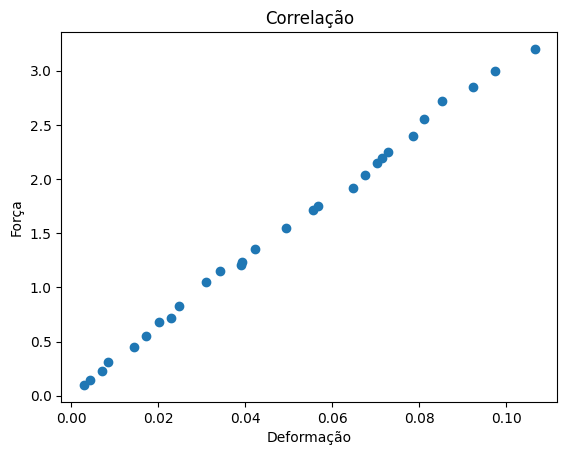

In [28]:
plt.scatter(mola1.deformacao,mola1.forca)
plt.title('Correlação')
plt.xlabel('Deformação')
plt.ylabel('Força')
plt.grid(False)
plt.show()

In [29]:
import seaborn as sns

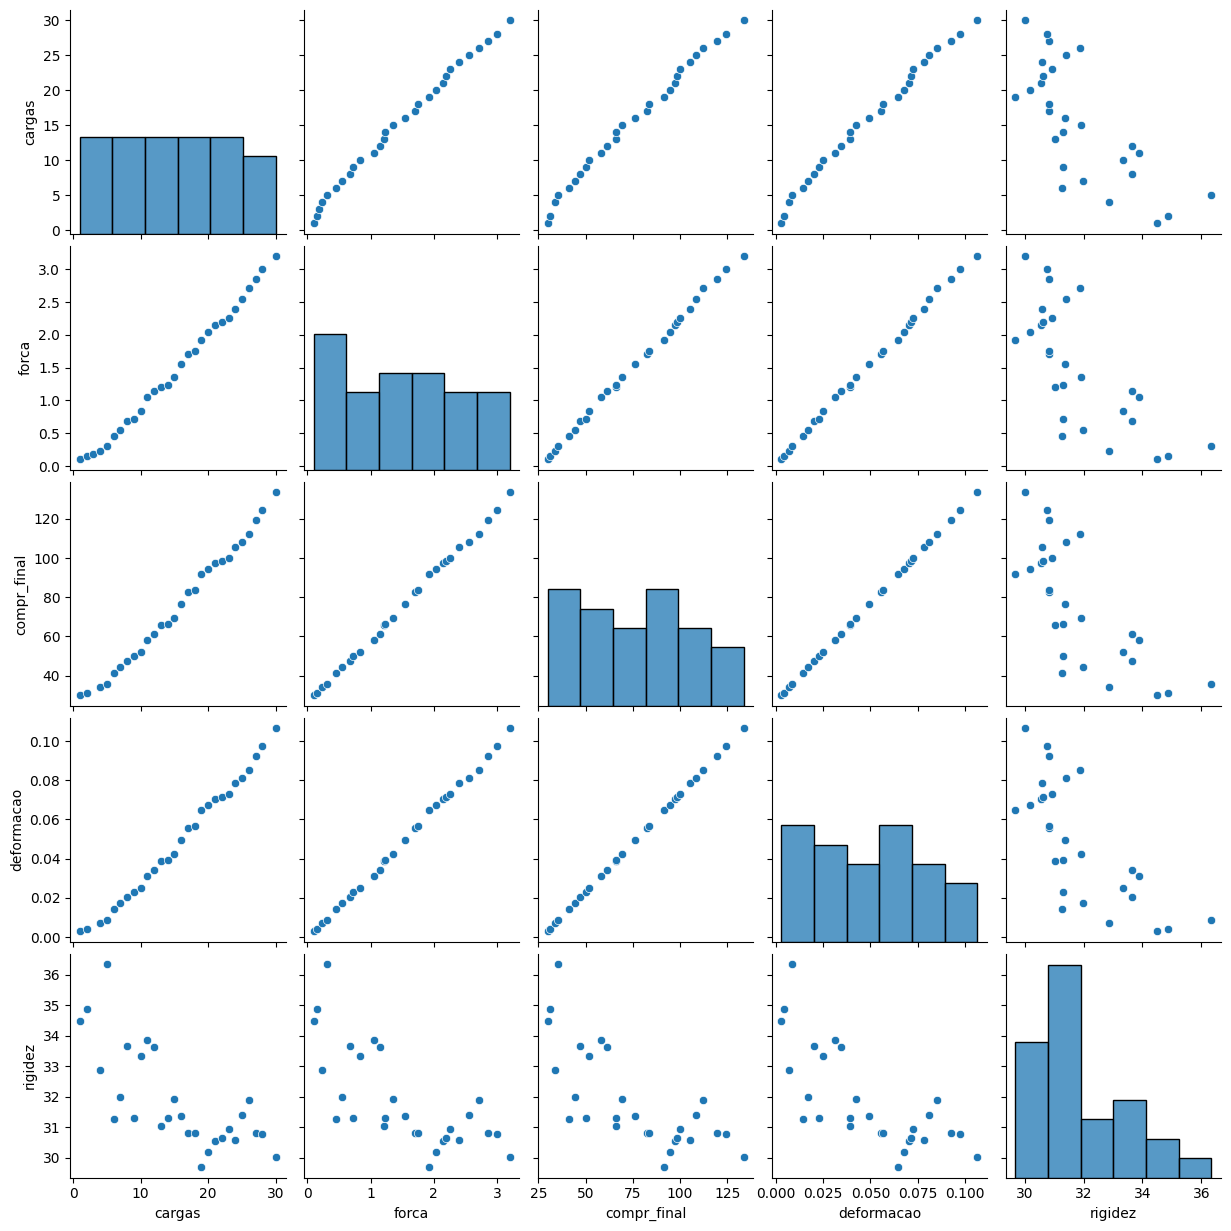

In [30]:
sns.pairplot(mola1);

## Análise da Normalidade

Gráfico QQ-Plot

In [31]:
import scipy.stats as stats

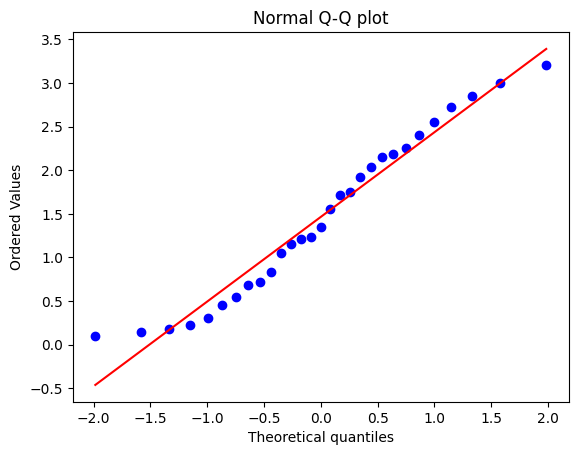

In [32]:
stats.probplot(mola1['forca'], dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

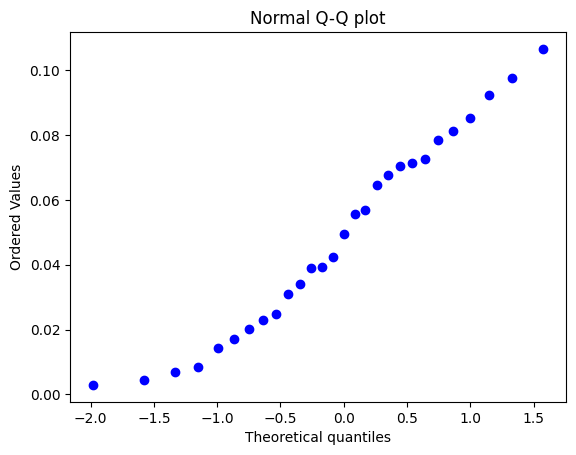

In [33]:
stats.probplot(mola1['deformacao'], dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

Teste Shapiro-Wilk

Ho = distribuição normal : p > 0.05

Ha = distribuição != normal : p <= 0.05

In [34]:
stats.shapiro(mola1.forca)

ShapiroResult(statistic=np.float64(0.9500340385404766), pvalue=np.float64(0.18341641684771381))

In [35]:
estatistica, p = stats.shapiro(mola1.forca)
print('Estatística do teste: {}'.format(estatistica))
print('p-valor: {}'.format(p))

Estatística do teste: 0.9500340385404766
p-valor: 0.18341641684771381


In [37]:
estatistica, p = stats.shapiro(mola1.deformacao)
print('Estatística do teste: {}'.format(estatistica))
print('p-valor: {}'.format(p))

Estatística do teste: nan
p-valor: nan


## Correlação Linear

Pearson (distribuição normal)

Spearman (distribuição não normal)

Kendall (distribuição não normal com quantidade pequena de amostras)

Ho = não há corrrelação linear: p > 0,05

Ha = existe correlação linear: p <= 0,05

In [38]:
# Pearson
coef,p = stats.pearsonr(mola1.deformacao,mola1.forca)
print('Coeficiente de correlação: {}'.format(coef))
print('p-valor: {}'.format(p))

Coeficiente de correlação: nan
p-valor: nan


In [39]:
# Spearman
coef,p = stats.spearmanr(mola1.deformacao,mola1.forca)
print('Coeficiente de correlação: {}'.format(coef))
print('p-valor: {}'.format(p))

Coeficiente de correlação: nan
p-valor: nan


In [40]:
# Kendall
coef,p = stats.kendalltau(mola1.deformacao,mola1.forca)
print('Coeficiente de correlação: {}'.format(coef))
print('p-valor: {}'.format(p))

Coeficiente de correlação: nan
p-valor: nan


In [41]:
correlacoes = mola1.corr(method='pearson')
correlacoes

,cargas,forca,compr_final,deformacao,rigidez
cargas,1.000000,0.997232,0.995672,0.995670,-0.728749
forca,0.997232,1.000000,0.999079,0.999079,-0.713098
compr_final,0.995672,0.999079,1.000000,1.000000,-0.730160
deformacao,0.995670,0.999079,1.000000,1.000000,-0.730224
rigidez,-0.728749,-0.713098,-0.730160,-0.730224,1.000000


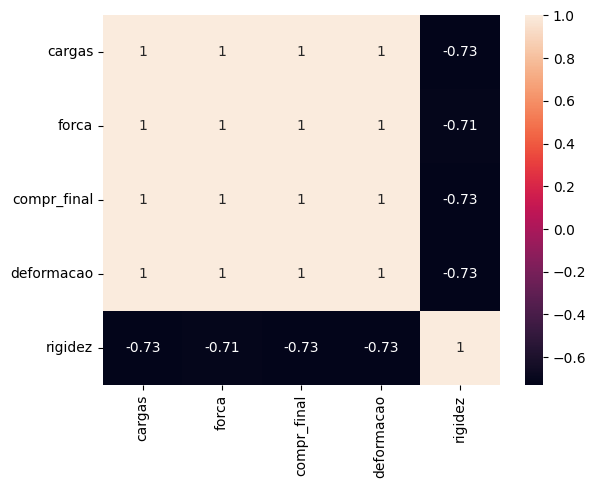

In [42]:
plt.figure()
sns.heatmap(correlacoes, annot=True);

# **MODELO DE REGRESSÃO LINEAR**

## Regressão Linear com Statsmodels

In [43]:
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms

In [46]:
# Criação do modelo
regressao = smf.ols('forca ~ deformacao', data = mola1).fit() #FORÇA É A VARIAVEL DEPENDENTE D EDEFORMAÇÃO (INDEPENDENTE)

In [47]:
residuos = regressao.resid
residuos

,0
0,-0.031277
1,-0.023602
3,-0.025230
4,0.009421
5,-0.028951
6,-0.013603
7,0.025700
8,-0.018951
9,0.033607
10,0.069188


### Teste de Normalidade dos resíduos

Ho = distribuição normal : p > 0.05

Ha = distribuição != normal : p <= 0.05

In [52]:
estatistica, p = stats.shapiro(residuos)
print('Estatística de teste: {}'.format(estatistica))
print('p-valor: {}'.format(p))

Estatística de teste: 0.9599487886133787
p-valor: 0.3477001951200734


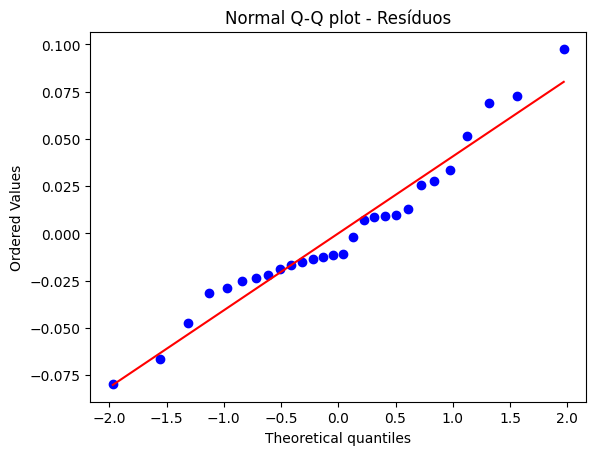

In [53]:
stats.probplot(residuos, dist="norm", plot=plt)
plt.title("Normal Q-Q plot - Resíduos")
plt.show()

**Modelo aprovado**

### **Regressão Linear**

In [54]:
print(regressao.summary()) ## simples: y = a.x + b //y = variavel dependente, a = coeficiente, x = varivel independente, b = intercepto
#F = 30,23.X + 0,0436 (K.x)

                            OLS Regression Results                            
Dep. Variable:                  forca   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 1.409e+04
Date:                Wed, 14 May 2025   Prob (F-statistic):           4.36e-37
Time:                        19:09:30   Log-Likelihood:                 50.909
No. Observations:                  28   AIC:                            -97.82
Df Residuals:                      26   BIC:                            -95.15
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0436      0.015      2.994      0.0

Estatística t:

Ho = coeficiente igual a zero : p > 0,05 (coeficiente não validado)

Ha = coeficiente diferente de zero: p <= 0,05 (coeficiente validado)

**Equação: Força = 0,0436 + 30,2326.deformação**

**R^2 ajustado = 0,998**

In [55]:
regressao.params

,0
Intercept,0.043602
deformacao,30.232571


In [61]:
mola1.head()

,cargas,forca,compr_final,deformacao,rigidez
0,1,0.10,29.90,0.0029,34.48
1,2,0.15,31.30,0.0043,34.88
2,3,0.18,NaN,NaN,NaN
3,4,0.23,34.00,0.0070,32.86
4,5,0.31,35.53,0.0085,36.34


In [62]:
regressao.predict()

array([0.13127682, 0.17360242, 0.25523036, 0.30057922, 0.47895139,
       0.56360259, 0.6543003 , 0.7389515 , 0.79639338, 0.98081207,
       1.07755629, 1.22267264, 1.23174241, 1.32244012, 1.53709137,
       1.72151006, 1.7608124 , 1.99964971, 2.08732417, 2.17197536,
       2.20523119, 2.24271958, 2.41685919, 2.49848713, 2.62244067,
       2.84011518, 2.99127804, 3.26639443])

<ipython-input-63-07a91cc1ae38>:3: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



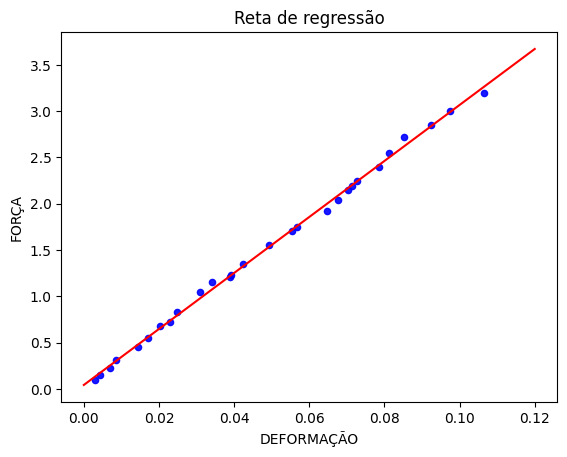

In [63]:
plt.scatter(y=mola1.forca, x=mola1.deformacao, color='blue', s=20, alpha=0.9)
X_plot = np.linspace(0, 0.12)
plt.plot(X_plot, X_plot*regressao.params[1] + regressao.params[0], color='r')
plt.title('Reta de regressão')
plt.ylabel('FORÇA')
plt.xlabel('DEFORMAÇÃO')
plt.show()

In [66]:
#Criação do modelo
regressao2 = smf.ols('rigidez ~ forca', data = mola1).fit() #FORÇA É A VARIAVEL DEPENDENTE D EDEFORMAÇÃO (INDEPENDENTE)

In [74]:
residuos2 = regressao2.resid
residuos2

,0
0,0.839591
1,1.302507
3,-0.616826
4,2.963840
5,-1.949994
6,-1.094161
7,0.749422
8,-1.560245
9,0.608172
10,1.425004


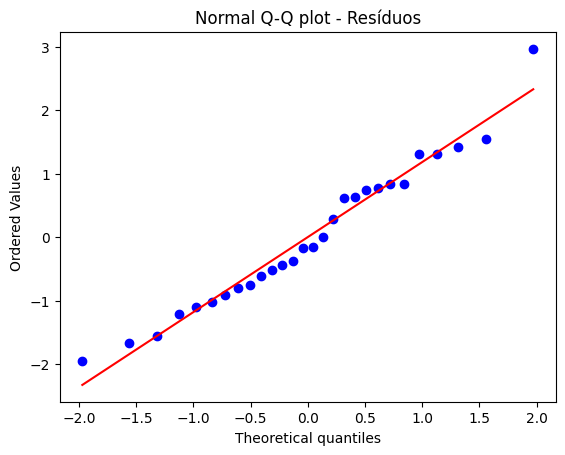

In [70]:
stats.probplot(residuos2, dist="norm", plot=plt)
plt.title("Normal Q-Q plot - Resíduos")
plt.show()

<ipython-input-80-fc1002324e26>:3: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



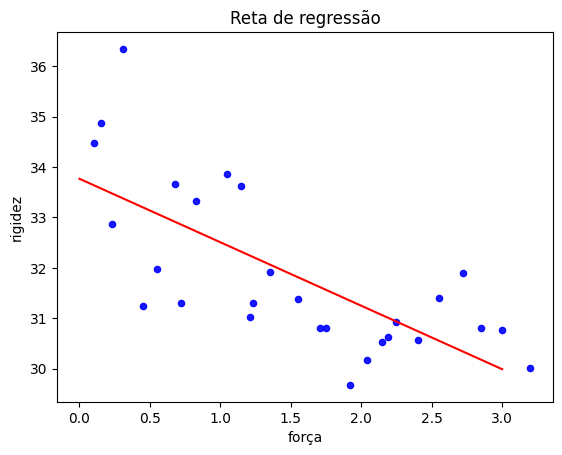

In [80]:
plt.scatter(y=mola1.rigidez, x=mola1.forca, color='blue', s=20, alpha=0.9)
X_plot = np.linspace(0, 3.0)
plt.plot(X_plot, X_plot*regressao.params[1] + regressao.params[0], color='r')
plt.title('Reta de regressão')
plt.ylabel('rigidez')
plt.xlabel('força')
plt.show()